In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
trainA = []
trainB = []
for i in range(1,601):
  img = cv2.imread('/content/drive/My Drive/rain/{}clean.jpg'.format(i))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(256,256))
  trainA.append(img)
  img = cv2.imread('/content/drive/My Drive/rain/{}bad.jpg'.format(i))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(256,256))
  trainB.append(img)
trainA = np.array(trainA)
trainB = np.array(trainB)
trainA = (trainA - 127.5)/127.5
trainB = (trainB - 127.5)/127.5

Using TensorFlow backend.
W0904 08:39:37.273397 140255671867264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 08:39:37.309063 140255671867264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 08:39:37.321476 140255671867264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0904 08:39:37.370002 140255671867264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0904 08

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 256, 256, 6)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 6208        concatenate_1[0][0]        

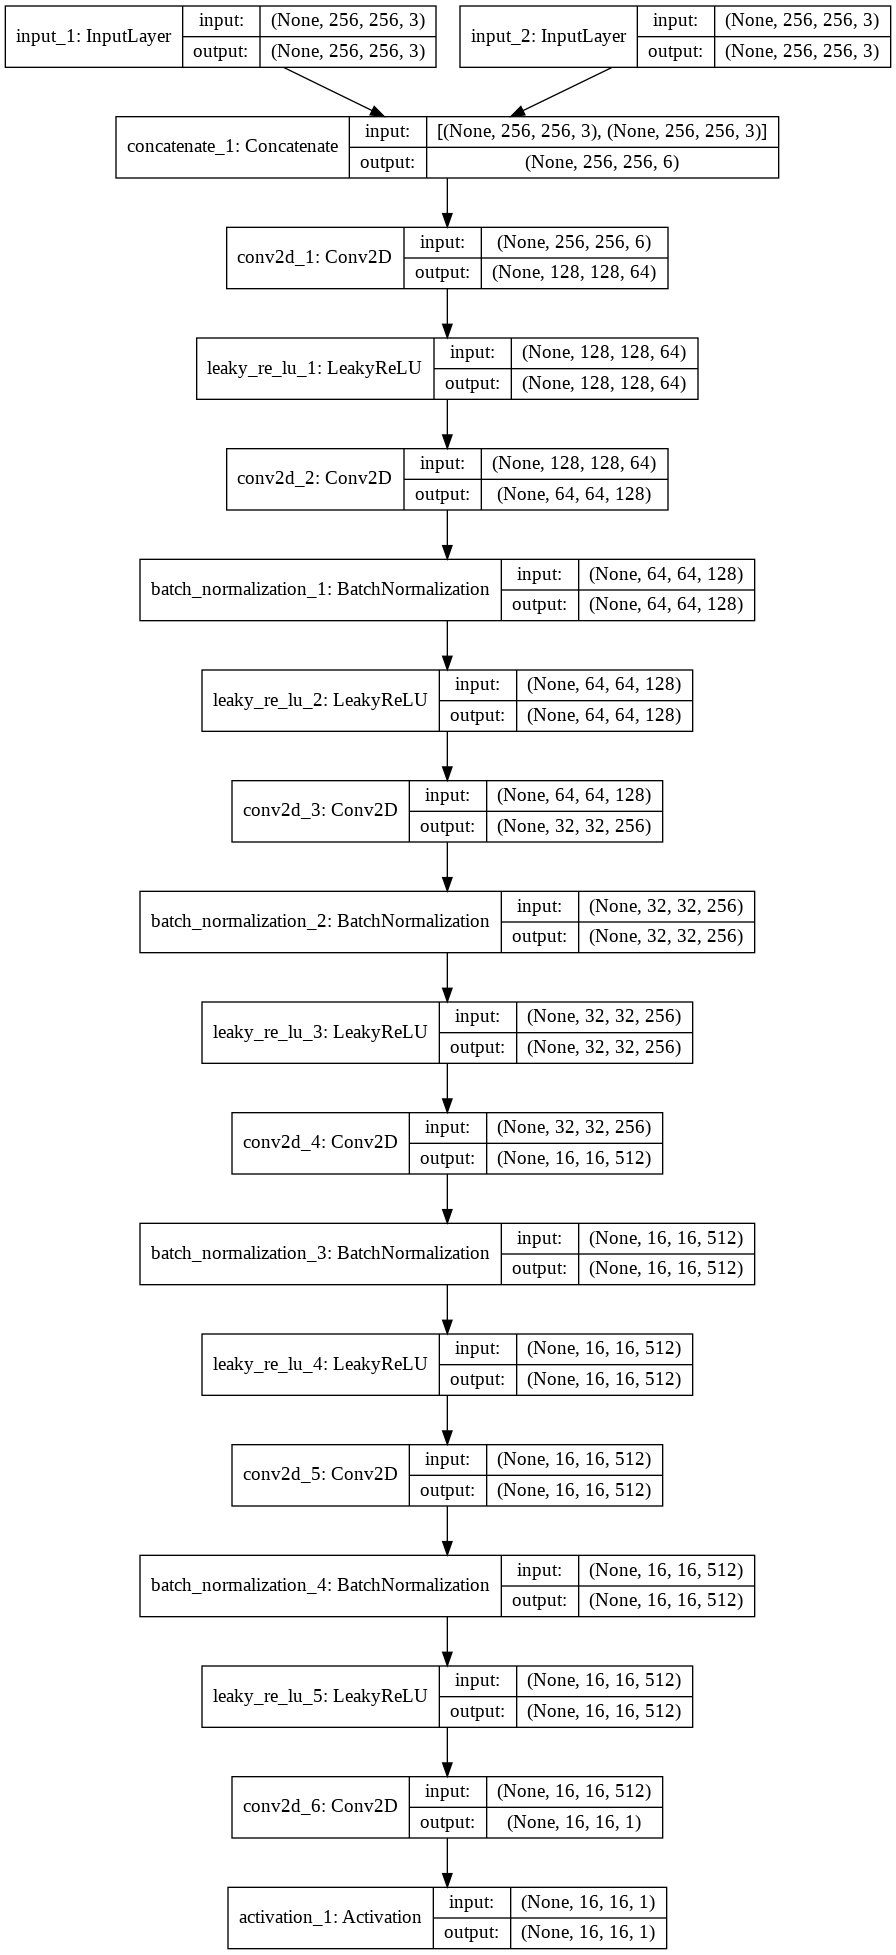

In [0]:
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model
 
# define image shape
image_shape = (256,256,3)
# create the model
model = define_discriminator(image_shape)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='/content/drive/My Drive/test/discriminator_model_plot.png', show_shapes=True, show_layer_names=True)

W0904 08:39:42.760470 140255671867264 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 128, 128, 64) 3136        input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_6 (LeakyReLU)       (None, 128, 128, 64) 0           conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 64, 64, 128)  131200      leaky_re_lu_6[0][0]              
____________________________________________________________________________________________

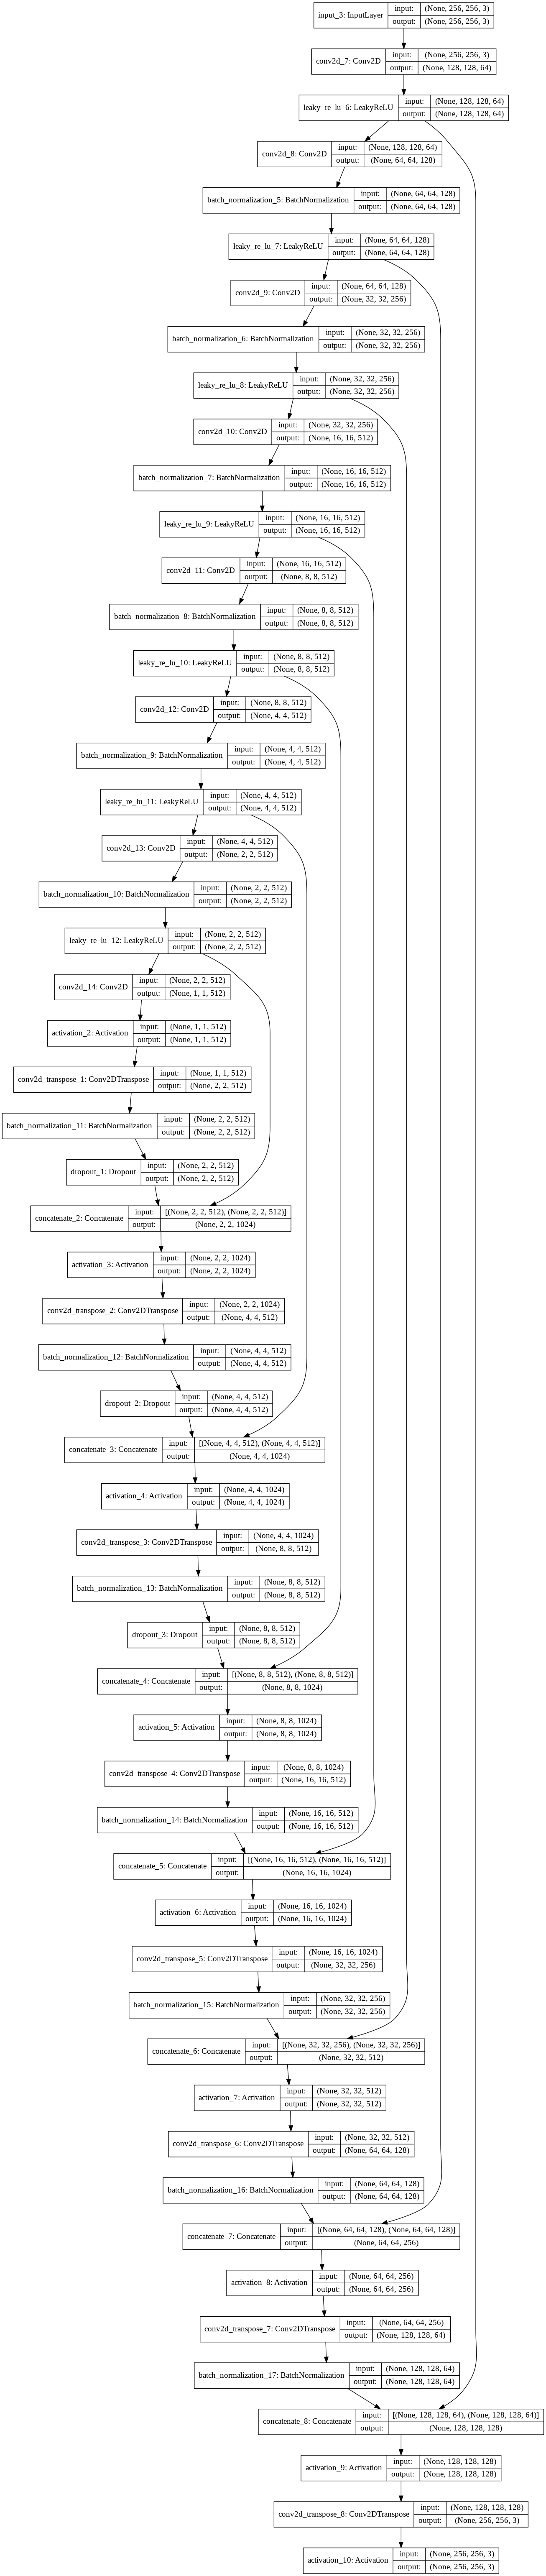

In [0]:

# example of defining a u-net encoder-decoder generator model
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model: C64-C128-C256-C512-C512-C512-C512-C512
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model: CD512-CD1024-CD1024-C1024-C1024-C512-C256-C128
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# define image shape
image_shape = (256,256,3)
# create the model
model = define_generator(image_shape)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='/content/drive/My Drive/test/generator_model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [0]:
def generate_real_samples(n_samples, patch_shape):
	# unpack dataset

	# choose random instances
	ix = np.random.randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [0]:
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = np.zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [0]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, d_model, gan_model, n_samples=1):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	X_fakeB = 255 * X_fakeB	
	# plot generated target image
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_fakeB[i])
	# save plot to file
	filename1 = '/content/drive/My Drive/test/plot_%06d.png' % (step+1)
	cv2.imwrite(filename1,X_fakeB[0])
	# save the ggenerator, discriminator and gan models
	filename2 = '/content/drive/My Drive/test/g_model_%06d.h5' % (step+1)
	g_model.save(filename2)
	filename3 = '/content/drive/My Drive/test/d_model_%06d.h5' % (step+1)
	d_model.save(filename3)
	filename4 = '/content/drive/My Drive/test/gan_model_%06d.h5' % (step+1)
	gan_model.save(filename4)
	print('>Saved: %s and %s and %s and %s' % (filename1, filename2, filename3, filename4))

In [0]:
def train(d_model, g_model, gan_model, n_epochs=200, n_batch=1, n_patch=16):
	# unpack dataset
  
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples( n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
    # summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model,d_model, gan_model)


In [0]:
image_shape = (256,256,3)
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, d1[0.309] d2[0.826] g[50.299]
>2, d1[0.354] d2[0.853] g[50.168]
>3, d1[0.358] d2[1.379] g[29.043]
>4, d1[0.343] d2[0.712] g[47.320]
>5, d1[0.484] d2[0.507] g[42.796]
>6, d1[0.445] d2[0.632] g[30.742]
>7, d1[0.392] d2[0.604] g[38.057]
>8, d1[0.379] d2[0.438] g[36.607]
>9, d1[0.488] d2[0.479] g[23.412]
>10, d1[0.424] d2[0.498] g[33.122]
>11, d1[0.450] d2[0.455] g[29.481]
>12, d1[0.462] d2[0.476] g[31.174]
>13, d1[0.438] d2[0.436] g[23.258]
>14, d1[0.437] d2[0.417] g[35.918]
>15, d1[0.453] d2[0.433] g[31.543]
>16, d1[0.432] d2[0.425] g[25.648]
>17, d1[0.408] d2[0.434] g[40.887]
>18, d1[0.397] d2[0.431] g[30.253]
>19, d1[0.412] d2[0.481] g[32.556]
>20, d1[0.575] d2[0.397] g[22.187]
>21, d1[0.437] d2[0.402] g[49.307]
>22, d1[0.397] d2[0.411] g[52.081]
>23, d1[0.396] d2[0.396] g[28.310]
>24, d1[0.431] d2[0.420] g[37.233]
>25, d1[0.397] d2[0.426] g[16.867]
>26, d1[0.408] d2[0.409] g[24.169]
>27, d1[0.406] d2[0.432] g[17.342]
>28, d1[0.395] d2[0.394] g[26.884]
>29, d1[0.377] d2[0.429] g[24

W0904 08:55:45.168578 140255671867264 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>5999, d1[0.028] d2[0.057] g[12.863]
>6000, d1[0.017] d2[0.064] g[23.507]
>Saved: /content/drive/My Drive/models1/plot_006000.png and /content/drive/My Drive/models1/g_model_006000.h5 and /content/drive/My Drive/models1/d_model_006000.h5 and /content/drive/My Drive/models1/gan_model_006000.h5
>6001, d1[0.349] d2[0.269] g[14.998]
>6002, d1[0.692] d2[0.415] g[11.124]
>6003, d1[0.243] d2[0.209] g[16.044]
>6004, d1[0.107] d2[0.071] g[14.672]
>6005, d1[0.029] d2[0.199] g[20.522]
>6006, d1[0.453] d2[0.107] g[9.549]
>6007, d1[0.012] d2[0.208] g[28.066]
>6008, d1[0.015] d2[0.401] g[20.039]
>6009, d1[0.337] d2[0.192] g[18.074]
>6010, d1[0.565] d2[0.129] g[18.940]
>6011, d1[0.646] d2[0.126] g[14.847]
>6012, d1[0.001] d2[0.315] g[17.606]
>6013, d1[0.042] d2[0.211] g[14.663]
>6014, d1[0.264] d2[0.119] g[23.760]
>6015, d1[0.091] d2[0.147] g[19.787]
>6016, d1[0.017] d2[0.142] g[13.166]
>6017, d1[0.024] d2[0.110] g[25.247]
>6018, d1[0.605] d2[0.347] g[14.207]
>6019, d1[0.780] d2[0.530] g[13.796]
>602

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
W0904 09:11:59.321524 140255671867264 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>11999, d1[0.373] d2[0.388] g[14.078]
>12000, d1[0.003] d2[0.116] g[25.837]
>Saved: /content/drive/My Drive/models1/plot_012000.png and /content/drive/My Drive/models1/g_model_012000.h5 and /content/drive/My Drive/models1/d_model_012000.h5 and /content/drive/My Drive/models1/gan_model_012000.h5
>12001, d1[0.455] d2[0.224] g[15.400]
>12002, d1[0.007] d2[0.100] g[14.311]
>12003, d1[0.003] d2[0.246] g[20.852]
>12004, d1[0.073] d2[0.157] g[23.275]
>12005, d1[0.187] d2[0.008] g[13.931]
>12006, d1[0.867] d2[0.637] g[15.503]
>12007, d1[0.334] d2[0.182] g[16.368]
>12008, d1[0.026] d2[0.109] g[16.948]
>12009, d1[0.458] d2[0.728] g[13.115]
>12010, d1[0.776] d2[0.595] g[14.304]
>12011, d1[0.054] d2[0.240] g[15.155]
>12012, d1[0.433] d2[0.614] g[13.168]
>12013, d1[0.353] d2[0.294] g[22.078]
>12014, d1[0.049] d2[0.116] g[15.358]
>12015, d1[0.962] d2[0.240] g[12.812]
>12016, d1[0.002] d2[0.131] g[14.878]
>12017, d1[0.099] d2[0.141] g[15.074]
>12018, d1[0.150] d2[0.339] g[13.331]
>12019, d1[0.273] d2

W0904 09:28:07.109638 140255671867264 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>17999, d1[0.008] d2[0.024] g[15.042]
>18000, d1[0.018] d2[0.172] g[16.276]
>Saved: /content/drive/My Drive/models1/plot_018000.png and /content/drive/My Drive/models1/g_model_018000.h5 and /content/drive/My Drive/models1/d_model_018000.h5 and /content/drive/My Drive/models1/gan_model_018000.h5
>18001, d1[0.016] d2[0.032] g[14.922]
>18002, d1[1.091] d2[0.210] g[11.935]
>18003, d1[0.033] d2[0.191] g[20.290]
>18004, d1[0.025] d2[0.161] g[16.187]
>18005, d1[0.172] d2[0.039] g[14.895]
>18006, d1[0.179] d2[0.084] g[13.601]
>18007, d1[0.033] d2[0.082] g[12.233]
>18008, d1[0.032] d2[0.178] g[12.696]
>18009, d1[0.005] d2[0.028] g[16.497]
>18010, d1[0.131] d2[0.034] g[16.075]
>18011, d1[0.024] d2[0.191] g[12.404]
>18012, d1[0.005] d2[0.013] g[28.249]
>18013, d1[0.160] d2[0.018] g[11.844]
>18014, d1[0.000] d2[0.074] g[19.593]
>18015, d1[0.351] d2[0.647] g[22.210]
>18016, d1[0.201] d2[0.017] g[25.101]
>18017, d1[0.000] d2[0.049] g[22.285]
>18018, d1[0.917] d2[0.139] g[12.284]
>18019, d1[0.017] d2